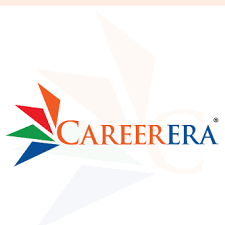

# <span style="color:blue"> ASSIGNMENT QUESTIONS (Regression)</span>

#### Question 1: Download the dataset from the link: https://drive.google.com/file/d/14jbYMWqfLwOwsNjjADf8YBqPMqamxGog/view?usp=sharing 
#### and perform necessary preprocessing task and predict total cost using regression technique.

In [1]:
#write your code here............
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
datas=pd.read_csv('company_sales_data.csv')
datas.head()
datas_x=datas.iloc[:,7:8].values
datas_y=datas.iloc[:,8:9].values
#datas_x=datas[datas.columns[7:8]]
#datas_y=datas[datas.columns[8:9]]

In [2]:
datas_x

array([[21100],
       [18330],
       [22470],
       [22270],
       [20960],
       [20140],
       [29550],
       [36140],
       [23400],
       [26670],
       [41280],
       [30020]], dtype=int64)

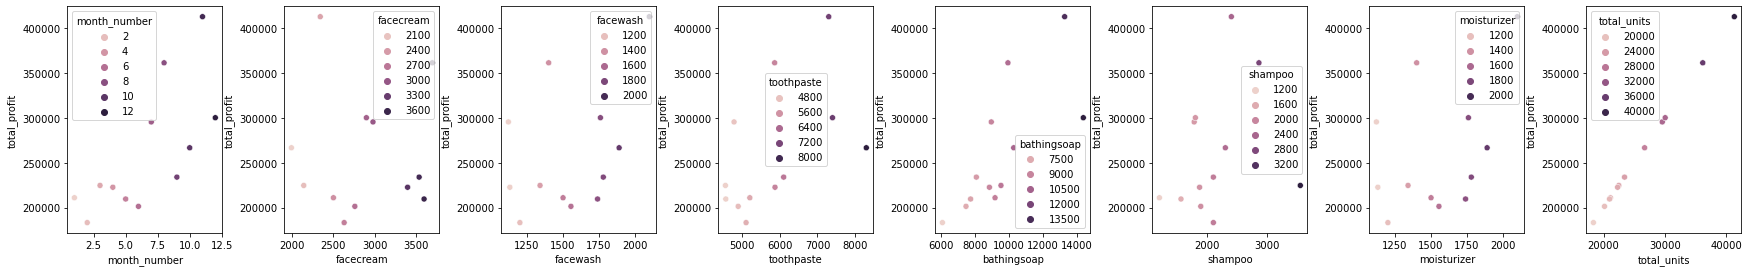

In [3]:
#plot scatter plots of total_profit to each of the variables
column_names = list(datas.columns)
#column_names
column_names.pop(-1)
fig = plt.figure(figsize = (30,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2,len(column_names),i+1)
    sns.scatterplot(x = datas[column_names[i]], y =datas['total_profit'], hue = datas[column_names[i]] )
# From the below plots, only total_units show linear relationship with total_profit 

In [4]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data
X_train, X_test, Y_train, Y_test = train_test_split(datas_x, datas_y, test_size=0.30,random_state=1)
#Create object of multiple linear regression
linear_regression = LinearRegression()
#Fit the model
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [5]:
# Create linear regression object
simple_linear_regression = LinearRegression()

simple_linear_regression.fit(X_train, Y_train)#build the model by training it with the training samples


# Make predictions using the testing set
Y_pred= simple_linear_regression.predict(X_test)

In [6]:
X_test

array([[22470],
       [22270],
       [20960],
       [41280]], dtype=int64)

In [7]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean squared error: 0.0


In [8]:
Y_pred

array([[224700.],
       [222700.],
       [209600.],
       [412800.]])

In [9]:
print("Mean absolute error: %.2f" % mean_absolute_error(Y_test,Y_pred))

Mean absolute error: 0.00


In [10]:
print('R2 Score: %.2f' % r2_score(Y_test,Y_pred))

R2 Score: 1.00


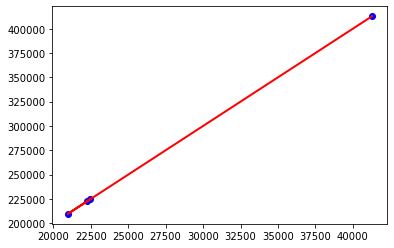

In [11]:
# Plot outputs
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, Y_pred, color='red', linewidth=2,)
plt.show()

#### Question 2: Download the dataset from the link:
https://drive.google.com/file/d/1g80eGXdcjhFzX4dy8Cn6VSmegS-9HF1i/view?usp=sharing 
#### and perform necessary preprocessing task and predict total cost using regression technique.¶

In [12]:
# this is not for cost but it is to predict chance of Admit
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets,linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import make_interp_spline
from sklearn.kernel_ridge import KernelRidge

In [13]:
#write your code here............
# Try to solve this using regression techniues (Linear regression)
# Loading the data and removing unwanted data-Serial number
record=pd.read_csv('Admission_Predict.csv')
record.keys()
record.drop('Serial No.', axis = 1, inplace = True)
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [14]:
record.columns = record.columns.str.strip()

In [15]:
record=record.rename(columns = {'Chance of Admit ':'Chance of Admit'})
record

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [16]:
#We can separate dependent and independent variables
#record_X = record[record.columns[0:7]]
record_X=record.drop('Chance of Admit',axis=1)
record_Y=record[record.columns[7:8]]

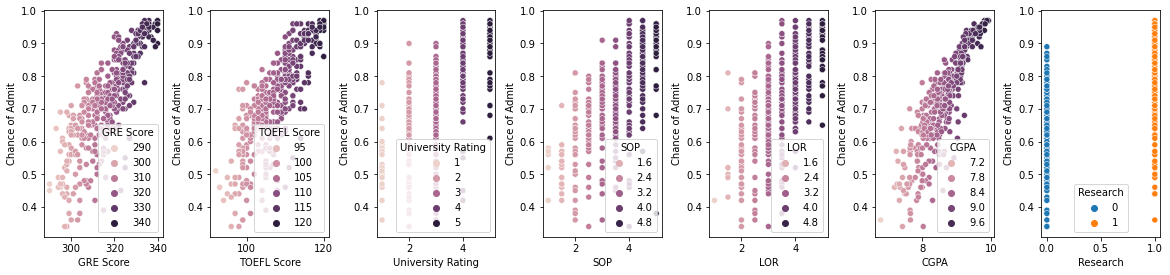

In [17]:
#plot scatter plots of Chance of Admission to each of the variables
column_names = list(record.columns)
#column_names
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2,len(column_names),i+1)
    sns.scatterplot(x = record[column_names[i]], y =record['Chance of Admit'], hue = record[column_names[i]] )
# From the below plots, CGPA, TOEFL score and GRE scores all appear to show a linear relationship with Chances of Admission. 

In [18]:
# Checking the correlation
corr=record_X.corr() 
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


<AxesSubplot:>

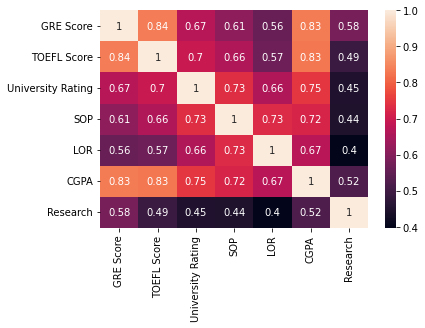

In [19]:
#Visualize correlation between attributes using heatmap
sns.heatmap(data=corr,annot=True) 

In [20]:
# Feature contains high correlation. We need to remove them first before apply regression techniques
# Create correlation matrix
abs_corr_matrix = corr.abs()

# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]
#np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool)
#up_tri
#Print correlated_features
print(correlated_features)

['TOEFL Score', 'CGPA']


C:\Users\ayoba\AppData\Local\Temp\ipykernel_6880\151136132.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))


In [21]:
#Divide the data into training and test set. train set contains 80% of the data. test set contains 20% of the data.
X_train, X_test, Y_train, Y_test = train_test_split(record_X, record_Y, test_size=0.20,random_state=0)
#Create object of multiple linear regression
linear_regression = LinearRegression()

In [22]:
#Fit the model
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [23]:
#Make prediction on test data
Y_pred = linear_regression.predict(X_test)
Y_pred

array([[0.69791327],
       [0.69343926],
       [0.77882728],
       [0.61577391],
       [0.72281999],
       [0.60286273],
       [0.7067783 ],
       [0.64104331],
       [0.87037545],
       [0.91874738],
       [0.53830841],
       [0.88537227],
       [0.70839345],
       [0.45744365],
       [0.85464724],
       [0.62329657],
       [0.63034415],
       [0.81411912],
       [0.58479826],
       [0.73198733],
       [0.8755188 ],
       [0.8436008 ],
       [0.65964574],
       [0.45723204],
       [0.78390781],
       [0.58302231],
       [0.49932541],
       [0.64153708],
       [0.88778116],
       [0.64950902],
       [0.64065401],
       [0.74057509],
       [0.74268991],
       [0.55702869],
       [0.78303581],
       [0.77159575],
       [0.65140153],
       [0.86244822],
       [0.63038997],
       [0.92925287],
       [0.72728695],
       [0.67164181],
       [0.70967833],
       [0.80792068],
       [0.8242496 ],
       [0.6540426 ],
       [0.56311848],
       [0.692

In [24]:
print("Mean squared error: %.1f" % mean_squared_error(Y_test,Y_pred))

Mean squared error: 0.0


In [25]:
print('Mean absolute error: %.2f' % mean_absolute_error(Y_test,Y_pred))

Mean absolute error: 0.05


In [26]:
# Plot outputs
#plt.scatter(X_test.reshape(1,-1), Y_test.reshape(1,-1),  color='blue')
#plt.plot(X_test.reshape(1,-1), Y_pred.reshape(1,-1), color='red', linewidth=2,)
#plt.show()

In [27]:
# Compare actual value and predicted value
Y_test['Pred'] = Y_pred
Y_test['Difference'] = abs(Y_test['Pred'] - Y_test['Chance of Admit'])
Y_test.head()

,Chance of Admit,Pred,Difference
132,0.71,0.697913,0.012087
309,0.70,0.693439,0.006561
341,0.79,0.778827,0.011173
196,0.73,0.615774,0.114226
246,0.72,0.722820,0.002820


**Question 3:Download the dataset from the below link:
https://drive.google.com/file/d/1oYAloMU93BxY8LhlONsh9qSW1ded6g8A/view?usp=sharing**
#### and perform regression analysis to predict the target variable price.

In [84]:
#write your code
# Loading the data and removing unwanted data-Serial number
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
toyo_info=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
toyo_info.keys()

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [85]:
toyo_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [86]:
toyo_info.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [87]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
toyo_info.drop(columns_to_drop, axis = 1, inplace= True)
toyo_info.head()

,Id,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Weight
0,1,13500,23,46986,Diesel,90,1,Blue,0,2000,3,1165
1,2,13750,23,72937,Diesel,90,1,Silver,0,2000,3,1165
2,3,13950,24,41711,Diesel,90,1,Blue,0,2000,3,1165
3,4,14950,26,48000,Diesel,90,0,Black,0,2000,3,1165
4,5,13750,30,38500,Diesel,90,0,Black,0,2000,3,1170


In [88]:
# Checking the correlation
corr=toyo_info.corr() 
corr

,Id,Price,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.079713,0.066265,-0.117704,-0.130207,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.108905,0.033081,0.126389,0.185326,0.581198
Age_08_04,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.108150,0.031717,-0.098084,-0.148359,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,-0.080503,-0.081854,0.102683,-0.036197,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.058712,0.013144,0.035856,0.092424,0.089614
Met_Color,-0.079713,0.108905,-0.108150,-0.080503,0.058712,1.000000,-0.019335,0.031812,0.085243,0.057929
Automatic,0.066265,0.033081,0.031717,-0.081854,0.013144,-0.019335,1.000000,0.066740,-0.027654,0.057249
cc,-0.117704,0.126389,-0.098084,0.102683,0.035856,0.031812,0.066740,1.000000,0.079903,0.335637
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.085243,-0.027654,0.079903,1.000000,0.302618
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.057929,0.057249,0.335637,0.302618,1.000000


<AxesSubplot:>

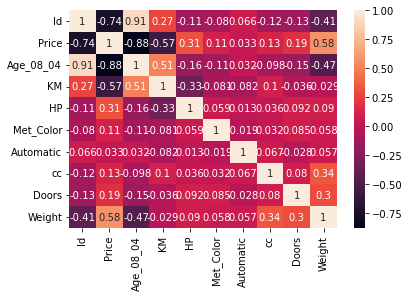

In [89]:
#Visualize correlation between attributes using heatmap
sns.heatmap(data=corr,annot=True) 

In [90]:
# Feature contains high correlation. We need to remove them first before apply regression techniques
# Create correlation matrix
abs_corr_matrix = corr.abs()

# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.70)]
#np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool)
#up_tri
#Print correlated_features
print(correlated_features)

['Price', 'Age_08_04']


C:\Users\ayoba\AppData\Local\Temp\ipykernel_6880\192438760.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))


In [91]:
#We can separate dependent and independent variables
X = toyo_info.iloc[:,2:3].values
Y = toyo_info.iloc[:,1:2].values
X

array([[23],
       [23],
       [24],
       ...,
       [71],
       [70],
       [76]], dtype=int64)

In [36]:
# Splittinh the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

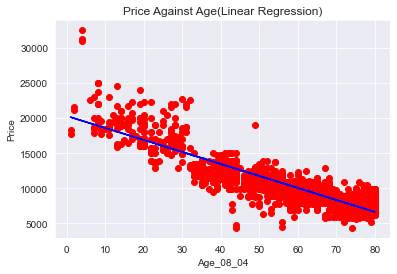

In [209]:
#  Fitting Linear Regression to Dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,Y)

# Visualizing the Linear Regression
def viz_linear():
    plt.scatter(X,Y, color='red')
    plt.plot(X,lin_reg.predict(X),color='blue')
    plt.title('Price Against Age(Linear Regression)')
    plt.xlabel('Age_08_04')
    plt.ylabel('Price')
    plt.show()
    return
viz_linear()

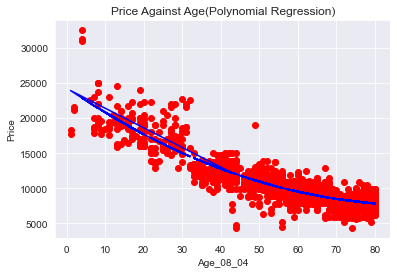

In [215]:
# Fitting Polynomial Regression to Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree =3)
X_poly=poly_reg.fit_transform(X)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,Y)

# Visualizing the Linear Regression
def viz_Polynomial():
    plt.scatter(X,Y, color='red')
    plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
    plt.title('Price Against Age(Polynomial Regression)')
    plt.xlabel('Age_08_04')
    plt.ylabel('Price')
    plt.show()
    return
viz_Polynomial()

**Question 4:Download the dataset from the below link:
https://drive.google.com/file/d/1uS7F5zzwYe5fK9buiWAQU4aPMDdiP89a/view?usp=sharing**
##### and perform regression analysis to predict the target variable Profit

In [140]:
#write your code here............
# this is not for cost but it is to predict chance of Admit
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import datasets,linear_model
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import make_interp_spline
from sklearn.kernel_ridge import KernelRidge

# Retrieving the zrecords from the dataset
startup_info=pd.read_csv('50_Startups.csv')
startup_info.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [141]:
startup_info.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [142]:
# Drop the column State.
#startup_info.drop('State', axis = 1, inplace = True)
#startup_info.head()

In [143]:
# Checking the correlation
corr=startup_info.corr() 
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [144]:
# Feature contains high correlation. We need to remove them first before apply regression techniques
# Create correlation matrix
abs_corr_matrix = corr.abs()

# Select upper triangle of matrix
up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))

# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.70)]
#np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool)
#up_tri
#Print correlated_features
print(correlated_features)

['Marketing Spend', 'Profit']


C:\Users\ayoba\AppData\Local\Temp\ipykernel_6880\192438760.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  up_tri = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(np.bool))


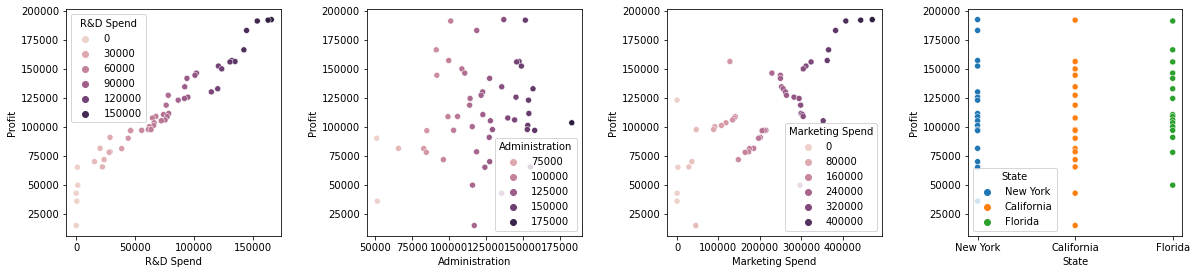

In [145]:
#plot scatter plots of Profit to each of the variables
column_names = list(startup_info.columns)
#column_names
column_names.pop(-1)
fig = plt.figure(figsize = (20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, len(column_names)):
    ax = fig.add_subplot(2,len(column_names),i+1)
    sns.scatterplot(x = startup_info[column_names[i]], y =startup_info['Profit'], hue = startup_info[column_names[i]] )
# From the below plots only R&D Spend appear to show a linear relationship with Profit.

In [152]:
#We can separate dependent and independent variables
X = startup_info.iloc[:,0:1].values
Y = startup_info.iloc[:,4:5].values

In [173]:
X

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [174]:

Y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

In [186]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [201]:
#  Fitting Linear Regression to Dataset
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression() #actually produces the linear eqn/train model for the data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [202]:
#Make prediction on test data
Y_pred = lin_reg.predict(X_test)
Y_pred

array([[104347.29054818],
       [134059.15325094],
       [135124.30398379],
       [ 71598.91750239],
       [179346.89726824],
       [109544.72355241],
       [ 65022.1146424 ],
       [100129.03206143],
       [111164.14538661],
       [169619.71578557],
       [ 95286.60066917],
       [ 87150.76014861],
       [112309.27339546],
       [ 87504.38861279],
       [126401.4513695 ]])

In [216]:
print("Mean squared error: %.1f" % mean_squared_error(y_test,Y_pred))

Mean squared error: 61737390.7


In [217]:
print('R2 Score: %.2f' % r2_score(y_test,Y_pred))

R2 Score: 0.94


In [218]:
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,Y_pred))

Mean absolute error: 6435.90


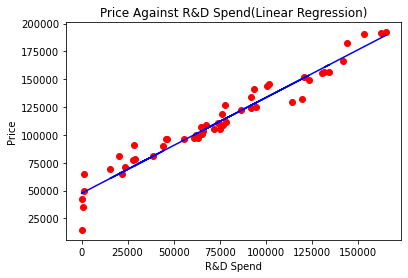

In [220]:
# To draw the plot for linear regression
plt.scatter(X,Y, color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Price Against R&D Spend(Linear Regression)')
plt.xlabel('R&D Spend')
plt.ylabel('Price')
plt.show()

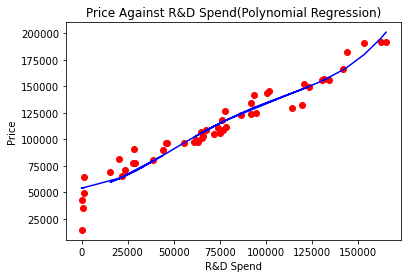

In [222]:


# Fitting Polynomial Regression to Dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree =4)
X_poly=poly_reg.fit_transform(X)
pol_reg=LinearRegression()
pol_reg.fit(X_poly,Y)

# To draw the plot for Polynomial regression
plt.scatter(X,Y, color='red')
plt.plot(X,pol_reg.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Price Against R&D Spend(Polynomial Regression)')
plt.xlabel('R&D Spend')
plt.ylabel('Price')
plt.show()
